## Temel Pandas Örnekleri

Bu not defteri, sizi bazı çok temel Pandas kavramlarıyla tanıştıracak. Tipik veri bilimi kütüphanelerini içe aktarmakla başlayacağız:


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Seri

Seri, bir listeye veya 1D-diziye benzer, ancak bir indeksle birlikte gelir. Tüm işlemler indeksle hizalanır.


In [37]:
a = pd.Series(range(1,10))
b = pd.Series(["I","like","to","use","Python","and","Pandas","very","much"],index=range(0,9))
print(a,b)

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int64 0         I
1      like
2        to
3       use
4    Python
5       and
6    Pandas
7      very
8      much
dtype: object


Serilerin sık kullanılan alanlarından biri **zaman serileridir**. Zaman serilerinde, indeksin özel bir yapısı vardır - genellikle bir tarih veya tarih-saat aralığıdır. Bu tür bir indeks `pd.date_range` ile oluşturulabilir.

Diyelim ki her gün satın alınan ürün miktarını gösteren bir serimiz var ve her pazar günü kendimiz için bir ürün almamız gerektiğini biliyoruz. İşte bunu seriler kullanarak nasıl modelleyebileceğimiz:


Length of index is 366


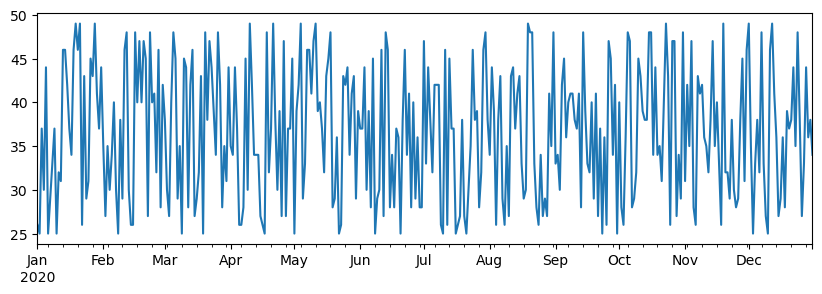

In [38]:
start_date = "Jan 1, 2020"
end_date = "Dec 31, 2020"
idx = pd.date_range(start_date,end_date)
print(f"Length of index is {len(idx)}")
items_sold = pd.Series(np.random.randint(25,50,size=len(idx)),index=idx)
items_sold.plot(figsize=(10,3))
plt.show()

In [39]:
additional_items = pd.Series(10,index=pd.date_range(start_date,end_date,freq="W"))
print(f"Additional items (10 item each week):\n{additional_items}")
total_items = items_sold+additional_items
print(f"Total items (sum of two series):\n{total_items}")

Additional items (10 item each week):
2020-01-05    10
2020-01-12    10
2020-01-19    10
2020-01-26    10
2020-02-02    10
2020-02-09    10
2020-02-16    10
2020-02-23    10
2020-03-01    10
2020-03-08    10
2020-03-15    10
2020-03-22    10
2020-03-29    10
2020-04-05    10
2020-04-12    10
2020-04-19    10
2020-04-26    10
2020-05-03    10
2020-05-10    10
2020-05-17    10
2020-05-24    10
2020-05-31    10
2020-06-07    10
2020-06-14    10
2020-06-21    10
2020-06-28    10
2020-07-05    10
2020-07-12    10
2020-07-19    10
2020-07-26    10
2020-08-02    10
2020-08-09    10
2020-08-16    10
2020-08-23    10
2020-08-30    10
2020-09-06    10
2020-09-13    10
2020-09-20    10
2020-09-27    10
2020-10-04    10
2020-10-11    10
2020-10-18    10
2020-10-25    10
2020-11-01    10
2020-11-08    10
2020-11-15    10
2020-11-22    10
2020-11-29    10
2020-12-06    10
2020-12-13    10
2020-12-20    10
2020-12-27    10
Freq: W-SUN, dtype: int64
Total items (sum of two series):
2020-01-01     NaN


Gördüğünüz gibi, burada sorunlar yaşıyoruz çünkü haftalık seride belirtilmeyen günler eksik (`NaN`) olarak kabul ediliyor ve bir sayıya `NaN` eklemek bize `NaN` veriyor. Doğru sonucu elde etmek için serileri toplarken `fill_value` belirtmemiz gerekiyor:


2020-01-01    26.0
2020-01-02    25.0
2020-01-03    37.0
2020-01-04    30.0
2020-01-05    54.0
              ... 
2020-12-27    43.0
2020-12-28    44.0
2020-12-29    36.0
2020-12-30    38.0
2020-12-31    34.0
Length: 366, dtype: float64


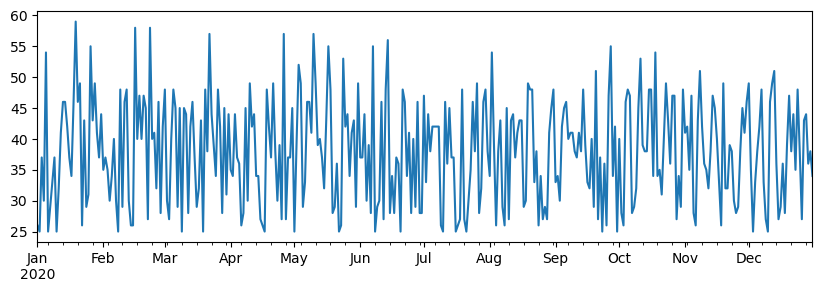

In [40]:
total_items = items_sold.add(additional_items,fill_value=0)
print(total_items)
total_items.plot(figsize=(10,3))
plt.show()

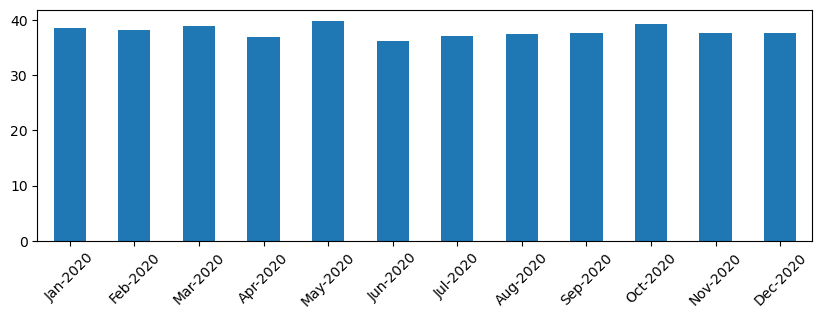

In [41]:
monthly = total_items.resample("1M").mean()
ax = monthly.plot(kind='bar',figsize=(10,3))
ax.set_xticklabels([x.strftime("%b-%Y") for x in monthly.index], rotation=45)
plt.show()

## DataFrame

Bir dataframe, aslında aynı indekse sahip bir dizi serinin bir koleksiyonudur. Birkaç seriyi bir araya getirerek bir dataframe oluşturabiliriz. Yukarıda tanımlanan `a` ve `b` serileri göz önüne alındığında:


In [42]:
df = pd.DataFrame([a,b])
df

0     1   2    3       4    5       6     7     8
0  1     2   3    4       5    6       7     8     9
1  I  like  to  use  Python  and  Pandas  very  much

Serileri sütunlar olarak da kullanabilir ve sütun adlarını sözlük kullanarak belirtebiliriz:


In [43]:
df = pd.DataFrame({ 'A' : a, 'B' : b })
df

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Aynı sonuç, sütunları yeniden adlandırarak (ve ardından yeniden adlandırarak, önceki örnekle eşleşecek şekilde) elde edilebilir:


In [44]:
pd.DataFrame([a,b]).T.rename(columns={ 0 : 'A', 1 : 'B' })

A       B
0  1       I
1  2    like
2  3      to
3  4     use
4  5  Python
5  6     and
6  7  Pandas
7  8    very
8  9    much

Veri Çerçevesinden **sütun seçimi** şu şekilde yapılabilir:


In [45]:
print(f"Column A (series):\n{df['A']}")
print(f"Columns B and A (DataFrame):\n{df[['B','A']]}")

Column A (series):
0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
Name: A, dtype: int64
Columns B and A (DataFrame):
        B  A
0       I  1
1    like  2
2      to  3
3     use  4
4  Python  5
5     and  6
6  Pandas  7
7    very  8
8    much  9


**Satırların seçilmesi** filtre ifadesine göre:


In [46]:
df[df['A']<5]

A     B
0  1     I
1  2  like
2  3    to
3  4   use

Çalışma şekli, `df['A']<5` ifadesinin bir boolean serisi döndürmesidir; bu, ifadenin serinin her bir elemanı için `True` veya `False` olduğunu belirtir. Seri bir indeks olarak kullanıldığında, DataFrame'deki satırların bir alt kümesini döndürür. Bu nedenle, rastgele bir Python boolean ifadesi kullanmak mümkün değildir; örneğin, `df[df['A']>5 and df['A']<7]` yazmak yanlış olur. Bunun yerine, boolean seriler üzerinde özel `&` işlemini kullanmalısınız:


In [47]:
df[(df['A']>5) & (df['A']<7)]

A    B
5  6  and

Yeni hesaplanabilir sütunlar oluşturma. Veri çerçevemiz için sezgisel ifadeler kullanarak kolayca yeni hesaplanabilir sütunlar oluşturabiliriz. Aşağıdaki kod, A'nın ortalama değerinden sapmasını hesaplar.


In [48]:
df['DivA'] = df['A']-df['A'].mean()
df

A       B  DivA
0  1       I  -4.0
1  2    like  -3.0
2  3      to  -2.0
3  4     use  -1.0
4  5  Python   0.0
5  6     and   1.0
6  7  Pandas   2.0
7  8    very   3.0
8  9    much   4.0

Aslında olan şey, bir seri hesaplıyoruz ve ardından bu seriyi sol tarafa atayarak başka bir sütun oluşturuyoruz.


In [49]:
# WRONG: df['ADescr'] = "Low" if df['A'] < 5 else "Hi"
df['LenB'] = len(df['B']) # Wrong result

In [50]:
df['LenB'] = df['B'].apply(lambda x: len(x))
# or
df['LenB'] = df['B'].apply(len)
df

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6
5  6     and   1.0     3
6  7  Pandas   2.0     6
7  8    very   3.0     4
8  9    much   4.0     4

Sayıları temel alarak **satır seçimi**, `iloc` yapısı kullanılarak yapılabilir. Örneğin, DataFrame'den ilk 5 satırı seçmek için:


In [52]:
df.iloc[:5]

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

**Gruplama**, genellikle Excel'deki *özet tablolar* ile benzer bir sonuç elde etmek için kullanılır. Diyelim ki her bir `LenB` değeri için sütun `A`'nın ortalama değerini hesaplamak istiyoruz. O zaman DataFrame'imizi `LenB` ile gruplayabilir ve `mean` çağırabiliriz:


In [53]:
df.groupby(by='LenB').mean()

A      DivA
LenB                    
1     1.000000 -4.000000
2     3.000000 -2.000000
3     5.000000  0.000000
4     6.333333  1.333333
6     6.000000  1.000000

Grubun ortalamasını ve eleman sayısını hesaplamamız gerekiyorsa, daha karmaşık bir `aggregate` fonksiyonu kullanabiliriz:


In [58]:
df.groupby(by='LenB') \
 .aggregate({ 'DivA' : len, 'A' : lambda x: x.mean() }) \
 .rename(columns={ 'DivA' : 'Count', 'A' : 'Mean'})

Count      Mean
LenB                 
1         1  1.000000
2         1  3.000000
3         2  5.000000
4         3  6.333333
6         2  6.000000

## Yazdırma ve Görselleştirme

Bir Veri Bilimcisi genellikle veriyi keşfetmek zorundadır, bu yüzden veriyi görselleştirebilmek önemlidir. DataFrame büyük olduğunda, çoğu zaman her şeyin doğru yapıldığından emin olmak için sadece ilk birkaç satırı yazdırmak isteriz. Bunu `df.head()` çağrısını yaparak gerçekleştirebilirsiniz. Eğer bunu Jupyter Notebook'ta çalıştırıyorsanız, DataFrame'i güzel bir tablo formatında yazdıracaktır.


In [59]:
df.head()

A       B  DivA  LenB
0  1       I  -4.0     1
1  2    like  -3.0     4
2  3      to  -2.0     2
3  4     use  -1.0     3
4  5  Python   0.0     6

`plot` fonksiyonunun bazı sütunları görselleştirmek için kullanımını da gördük. `plot` birçok görev için çok kullanışlıdır ve `kind=` parametresi sayesinde birçok farklı grafik türünü destekler. Ancak, daha karmaşık bir şey çizmek istediğinizde her zaman ham `matplotlib` kütüphanesini kullanabilirsiniz. Veri görselleştirmeyi ayrı derslerde detaylı bir şekilde ele alacağız.


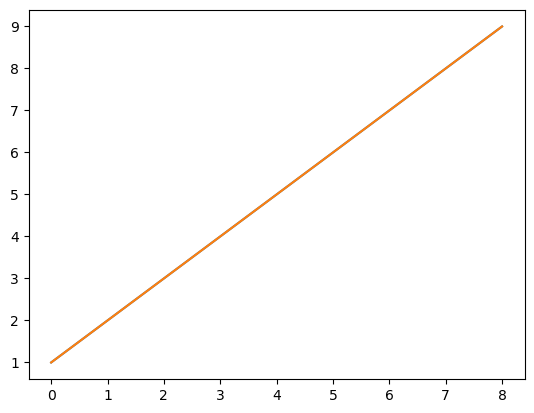

In [61]:
df['A'].plot()
plt.show()

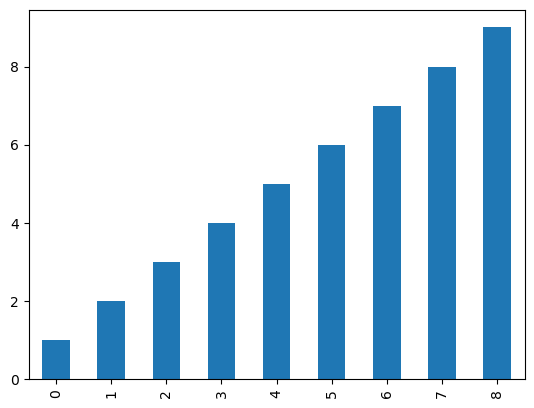

In [63]:
df['A'].plot(kind='bar')
plt.show()

Bu genel bakış, Pandas'ın en önemli kavramlarını kapsar, ancak kütüphane oldukça zengindir ve onunla yapabileceklerinizin bir sınırı yoktur! Şimdi bu bilgiyi belirli bir problemi çözmek için uygulayalım.



---

**Feragatname**:  
Bu belge, AI çeviri hizmeti [Co-op Translator](https://github.com/Azure/co-op-translator) kullanılarak çevrilmiştir. Doğruluk için çaba göstersek de, otomatik çevirilerin hata veya yanlışlıklar içerebileceğini lütfen unutmayın. Belgenin orijinal dili, yetkili kaynak olarak kabul edilmelidir. Kritik bilgiler için profesyonel insan çevirisi önerilir. Bu çevirinin kullanımından kaynaklanan yanlış anlama veya yanlış yorumlamalardan sorumlu değiliz.
